In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def diag3(a: np.array, b: np.array, c: np.array, f: np.array):
    n = b.shape[0]
    
    b1 = np.zeros(n)+b[0]
    for i in range(1, n):
        b1[i] = b[i]-a[i]*c[i-1]/b1[i-1]
    f1 = np.zeros(n)+f[0]
    for i in range(1, n):
        f1[i] = f[i]-a[i]*f1[i-1]/b1[i-1]

    x = np.zeros(n)+f1[n-1]/b1[n-1]
    for i in range(n-2, -1, -1):
        x[i] = (f1[i]-c[i]*x[i+1])/b1[i]
    return x

In [22]:
A = np.array(((1, 2, 0), (5, 7, 1), (0, 22, 31)))
d1, d2, d3 = np.array((0, 5, 22)), np.array((1, 7, 31)), np.array((2, 1, 0))
b = np.array((42, 239, 25))
# Checking correctness of 3-diagonal equation solving
expected = np.linalg.lstsq(A, b, rcond=None)[0]
res = diag3(d1, d2, d3, b)
print("Expected: ", expected, "\nGot: ", res)

Expected:  [57.2 -7.6  6.2] 
Got:  [57.2 -7.6  6.2]


In [54]:
class spline:
    def __init__(self, x: np.array, f: np.array):
        self.a = f
        self.x = x
        n = x.shape[0]
        h = x-np.insert(x, 0, 0)[:-1]

        d1, d3 = np.copy(h),np.insert(np.copy(h[1:]), n-1, 0)
        d2 = (d1+d3)*2
        d1[0], d2[0], d3[0] = 0, 1, 0
        d1[n-1], d2[n-1], d3[n-1] = 0, 1, 0

        res = np.zeros(n)
        for i in range(1, n-1):
            res[i] = 3*((f[i+1]-f[i])/h[i+1] - (f[i]-f[i-1])/h[i])
        
        self.c = diag3(d1, d2, d3, res)
        self.b, self.d = np.zeros(n), np.zeros(n)
        for i in range(1, n):
            self.d[i] = (self.c[i]-self.c[i-1])/3/h[i]
            self.b[i] = (f[i]-f[i-1])/h[i]-(self.c[i-1]*2+self.c[i])*h[i]/3

    def coefs(self):
        return self.a, self.b, self.c, self.d
    
    def get(self, x):
        l, r = 0, self.x.shape[0]
        while r-l>1:
            m = (r+l)//2
            if self.x[m]>x:
                r = m
            else:
                l = m
        return self.a[l]+x*self.b[l]+x*x*self.c[l]+x*x*x*self.d[l]

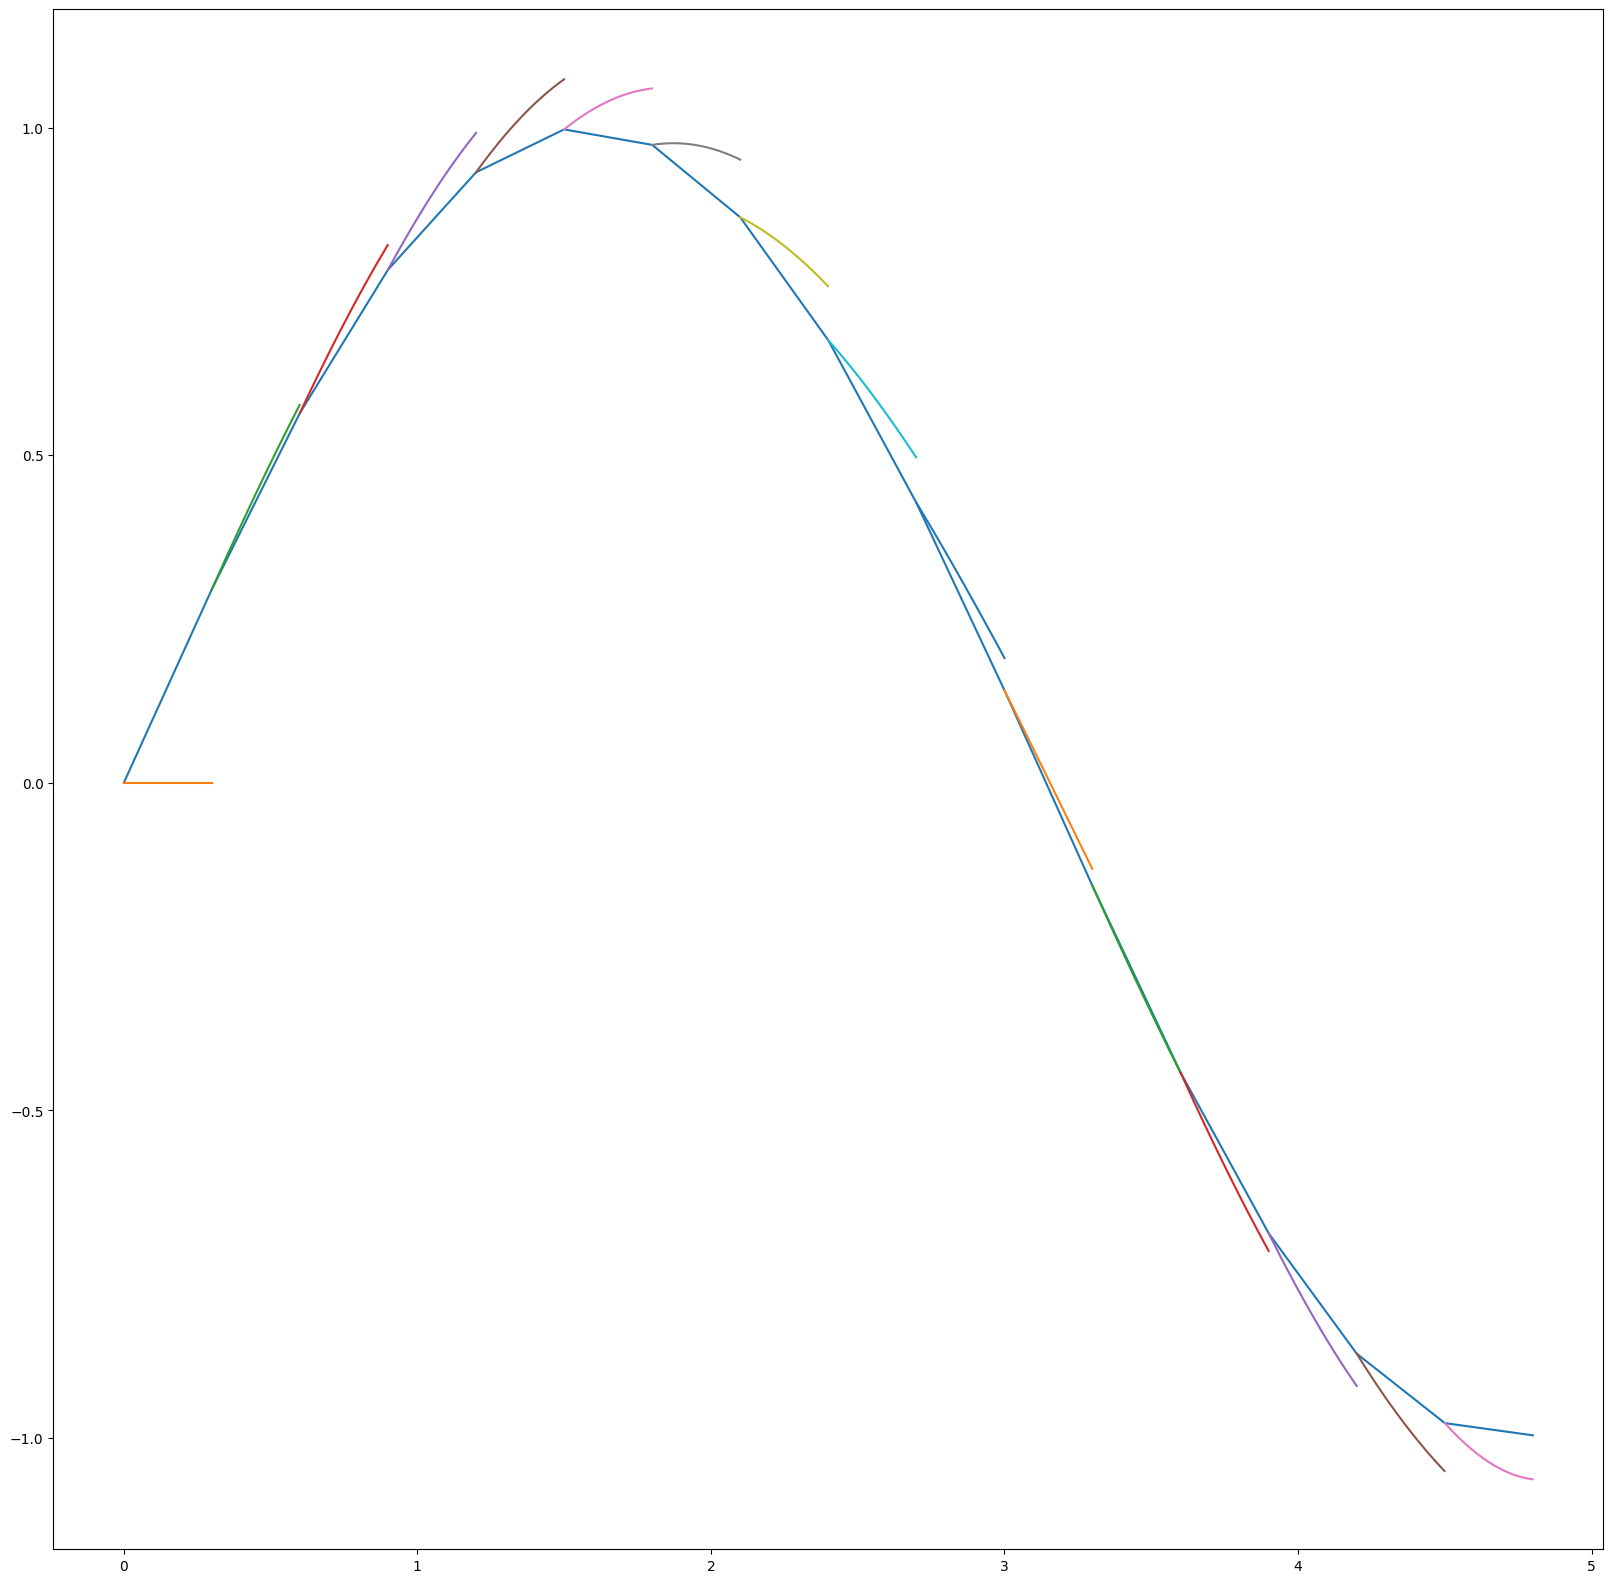

In [55]:
x_even = np.arange(0, 5, 0.3)
y_sin = np.sin(x_even)

spl = spline(x_even, y_sin)
plt.figure(figsize=(20, 20))
plt.plot(x_even, y_sin)
for i in range(len(x_even)-1):
    x_range = np.arange(x_even[i], x_even[i+1], 0.001) - x_even[i]
    plt.plot(x_range + x_even[i], x_range*x_range*x_range*spl.d[i]+x_range*x_range*spl.c[i]+x_range*spl.b[i]+spl.a[i])
plt.show()